In [1]:
import sys
sys.path.append("../")
from experiments.utils import generate_samples
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from estimators.N_estimators import sample_mean_and_cov
from estimators.Tyler_utils import Tyler_FP


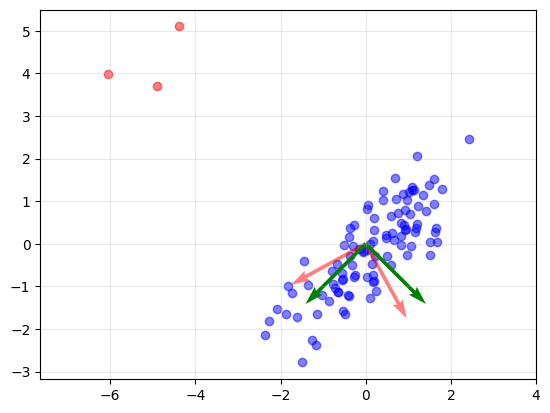

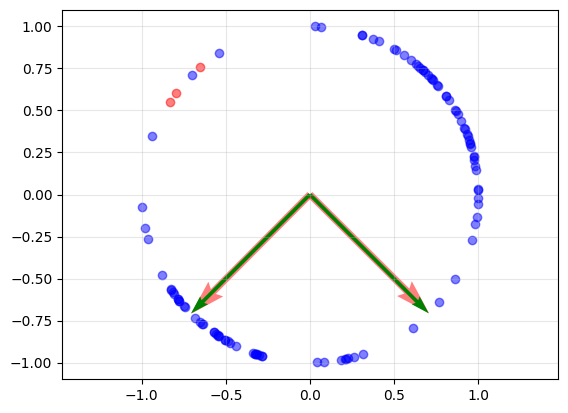

In [5]:
np.random.seed(0)
n, m = 2, 100 
cov_true = np.array([[1, 0.8], [0.8, 1]])
 
X = generate_samples(m, "N", {'mu': np.zeros((n, )), 'cov': cov_true}) 

num_outliers = 3
outliers = generate_samples(num_outliers, "N",  {'mu': np.array([-5,  5]), 'cov': cov_true})
X = np.hstack([X, outliers])
X = X - np.mean(X, axis=1, keepdims=True)
S_X = sample_mean_and_cov(X)[1]

evals0, evecs0 = LA.eigh(cov_true)
evecs0 = -evecs0

# Scatter plot of the data
fig = plt.figure()
plt.scatter(X[0, :-num_outliers], X[1, :-num_outliers], alpha=0.5, color="blue")
plt.scatter(X[0, -num_outliers:], X[1, -num_outliers:], alpha=0.5, color="red")
evals1, evecs1 = LA.eigh(S_X)

# Plot principal components
for i in range(2):
    component_vector = 2*evecs1[:, i]
    plt.quiver(0, 0, component_vector[0], component_vector[1], 
               angles='xy', scale_units='xy', alpha=0.5, scale=1, color='r', label=f'PC {i+1}')
    component_vector = 2*evecs0[:, i]
    plt.quiver(0, 0, component_vector[0], component_vector[1], 
               angles='xy', scale_units='xy', scale=1, color='g', label=f'PC {i+1}')

y_lb = -6
y_ub = 8
x_lb = -6 
x_ub = 6

plt.axis('equal')
plt.grid(alpha=0.3)

fig = plt.figure()
X_norm = X / LA.norm(X, axis=0)
plt.scatter(X_norm[0, :-num_outliers], X_norm[1, :-num_outliers], alpha=0.5, color="blue")
plt.scatter(X_norm[0, -num_outliers:], X_norm[1, -num_outliers:], alpha=0.5, color="red")

T_norm_scatter_estimate_T = Tyler_FP(X, 100)
evals2, evecs2 = LA.eigh(T_norm_scatter_estimate_T)
evecs2 = -evecs2

#Plot principal components
for i in range(2):
    component_vector = evecs2[:, i]
    plt.quiver(0, 0, component_vector[0], component_vector[1], 
               angles='xy', scale_units='xy', width=0.014, alpha=0.5, scale=1, color='r')
    component_vector = evecs0[:, i]
    plt.quiver(0, 0, component_vector[0], component_vector[1], 
               angles='xy', scale_units='xy', scale=1, color='g', )


plt.axis('equal') 
plt.grid(alpha=0.3)